In [68]:
%load_ext autoreload
%autoreload 2
%env WANDB_SILENT=true

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: WANDB_SILENT=true


In [69]:
import matplotlib.pyplot as plt
import torch
import torchaudio.datasets as datasets
from torchaudio.transforms import Spectrogram

In [71]:
def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    _, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, waveform[0])
    plt.title("Waveform")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

In [84]:
def plot_spectrogram(waveform):
    spectrogram_transform = Spectrogram(n_fft=1024)
    spectrogram = spectrogram_transform(waveform)

    plt.figure(figsize=(10, 4))
    plt.imshow(torch.log1p(spectrogram[0]).numpy(), aspect='auto', origin='lower')
    # plt.title("Spectrogram")
    # plt.xlabel("Time")
    # plt.ylabel("Frequency")
    # plt.colorbar(label="Log Amplitude")
    plt.show()

In [73]:
data = datasets.COMMONVOICE('./data/commonvoice/', 'validated.tsv')

clean, sample_rate, _ = data[0]
clean = clean[:, 70000:32768 + 70000:4]
print(clean.shape)

torch.Size([1, 8192])


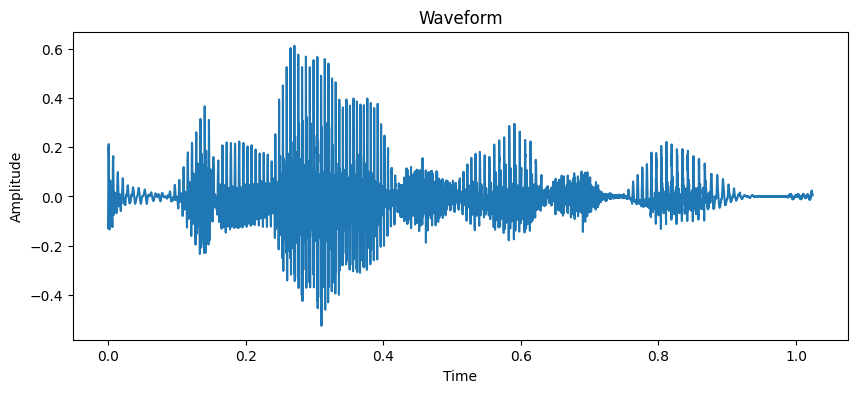

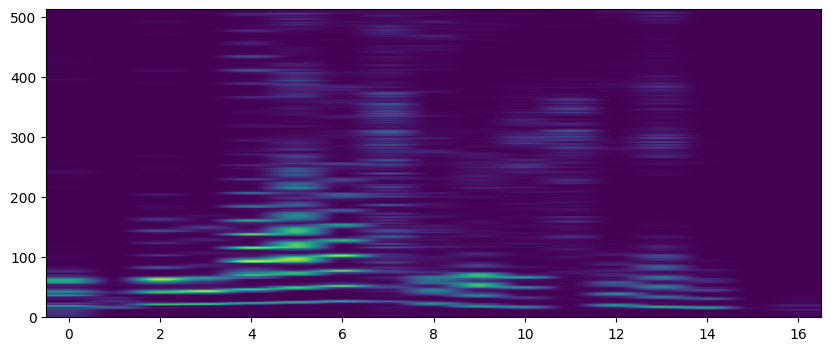

In [85]:
from IPython.display import Audio

plot_waveform(clean, sample_rate/4)
plot_spectrogram(clean)
Audio(clean.numpy()[0], rate=sample_rate/4)

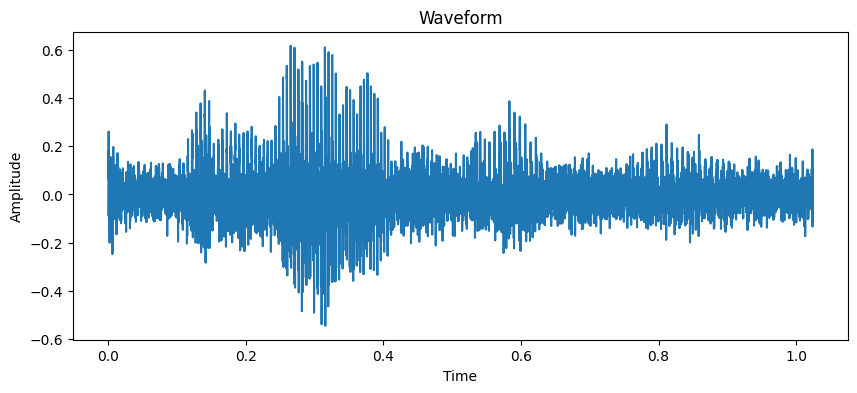

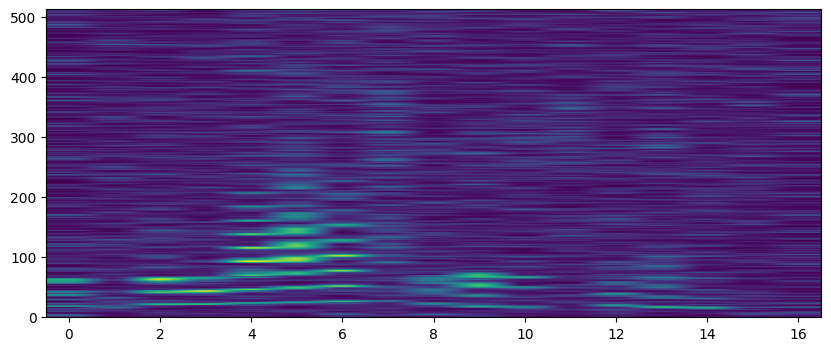

In [86]:
noisy = clean + torch.randn_like(clean)*0.05

plot_waveform(noisy, sample_rate/4)
plot_spectrogram(noisy)
Audio(noisy.numpy()[0], rate=sample_rate/4)

d:\Code\ML\zero-shot-das-denoising\.venv\Lib\site-packages\torchmetrics\functional\image\lpips.py:323: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.load_state_dict(tor

Running: 0 - DIP (1000) - UNetMod1d 
100
200
300
400
500
600
700
800
900
1000
Summary: {'runtime': '00:09:13'}



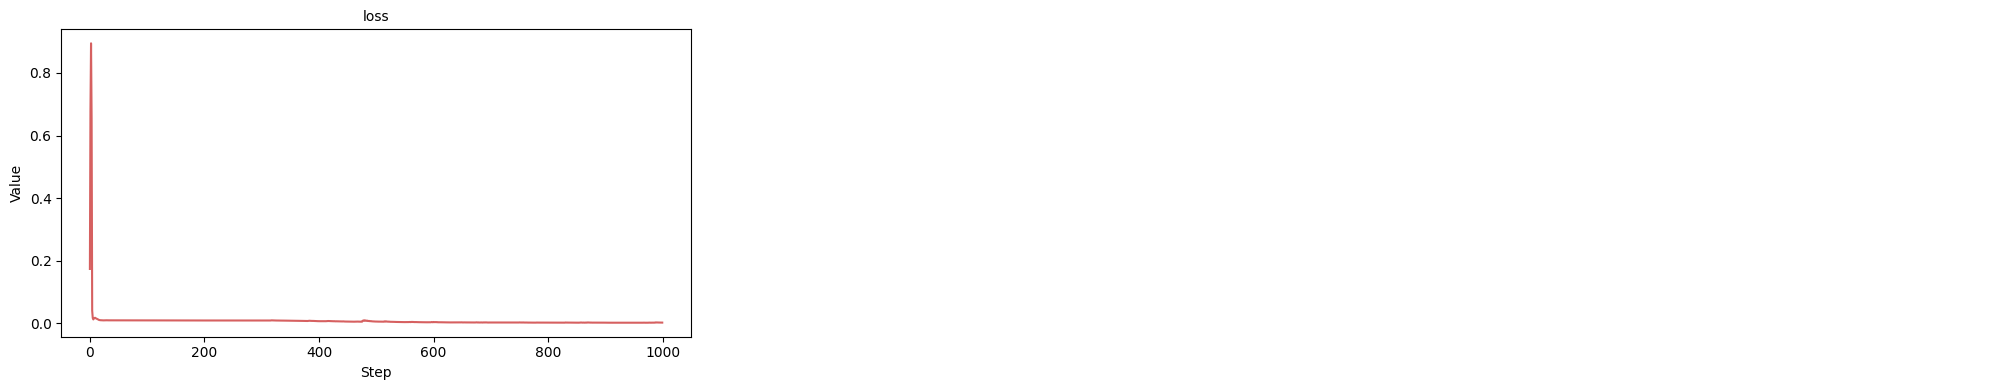

In [82]:
from models import UNetMod1d
from denoisers import DIP

dip = DIP(UNetMod1d(), max_epochs=1000)

denoised = dip.denoise(noisy.unsqueeze(0), options={"mode": "local", "metrics": [], "save_images": False, "config": {"data_id": 0}})
denoised = denoised.detach().cpu().squeeze(0)

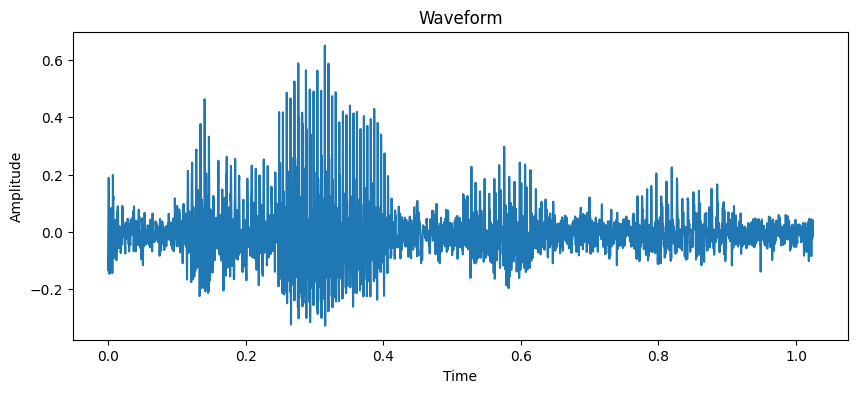

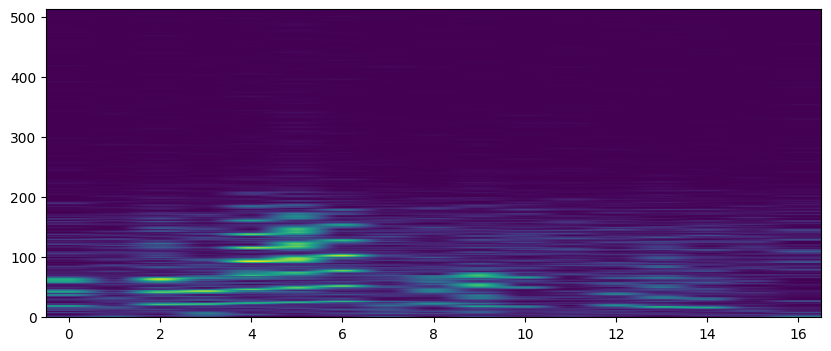

In [87]:
plot_waveform(denoised, sample_rate/4)
plot_spectrogram(denoised)
Audio(denoised.numpy()[0], rate=sample_rate/4)